#### Nama  : Farhan Dwi Pramana
#### NIM   : 2141720125
#### Absen : 11

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

  1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.

  2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.

  3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.

  4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,

    *   Merubah color space
    *   Reduksi dimensi
    *   dsb

  5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

Open Challange (Opsional)

  * Bagaimana cara melakukan evaluasi pada hasil segementasi?
  * Terapkan pada kasus ini!

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

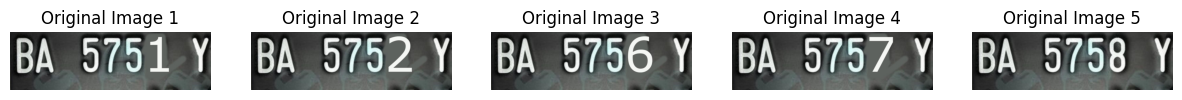

In [79]:
import cv2
import matplotlib.pyplot as plt

# Daftar nama file gambar
image_files = ['/content/drive/MyDrive/img/farhan/BA5751Y_png.rf.f8c4c1738e1d2b5ed1c63f713adebedd.jpg',
               '/content/drive/MyDrive/img/farhan/BA5752Y_png.rf.dfa11688aa62c71d3d1fd87c3b5eae1e.jpg',
               '/content/drive/MyDrive/img/farhan/BA5756Y_png.rf.1a29f4624b29315d05239c45069a68d6.jpg',
               '/content/drive/MyDrive/img/farhan/BA5757Y_png.rf.e4e7557f9e1bff8c2d6d1b986714f6ea.jpg',
               '/content/drive/MyDrive/img/farhan/BA5758Y_png.rf.d598c9b574971572f931ae8eb75564ed.jpg']

img = [cv2.imread(image_file) for image_file in image_files]

def show_images(img, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(img)):
        plt.subplot(1, len(img), i+1)
        # Convert image color space from BGR to RGB
        img_rgb = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# List of titles for each image
titles = ['Original Image 1', 'Original Image 2', 'Original Image 3', 'Original Image 4', 'Original Image 5']

# Display the images
show_images(img, titles)


In [61]:
for image_file in image_files:
    # Load gambar
    img = cv2.imread(image_file)

    # Ukuran Gambar
    h, w, ch= img.shape
    print("Height:", h)
    print("Width:", w)
    print("Channels:", ch)

Height: 343
Width: 1183
Channels: 3
Height: 343
Width: 1183
Channels: 3
Height: 343
Width: 1183
Channels: 3
Height: 343
Width: 1183
Channels: 3
Height: 343
Width: 1183
Channels: 3


In [62]:
for image_file in image_files:
    # Load gambar
    img = cv2.imread(image_file)

    data = img / 255.0
    data = data.reshape(h * w, ch)
    print("Data Shape", data.shape)

Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)


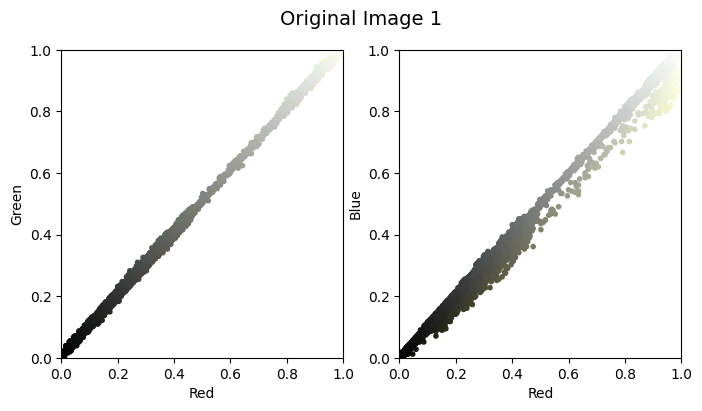

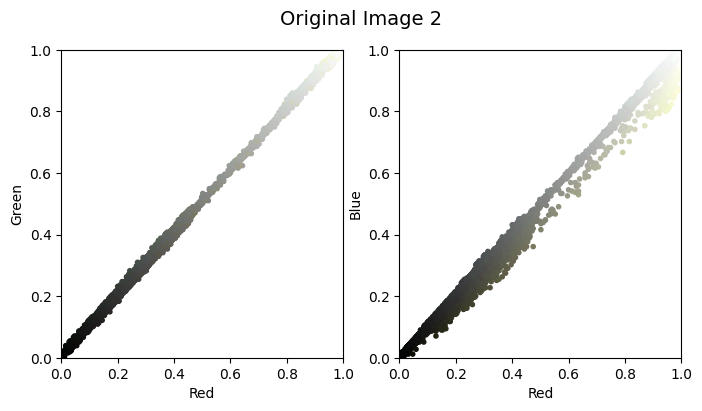

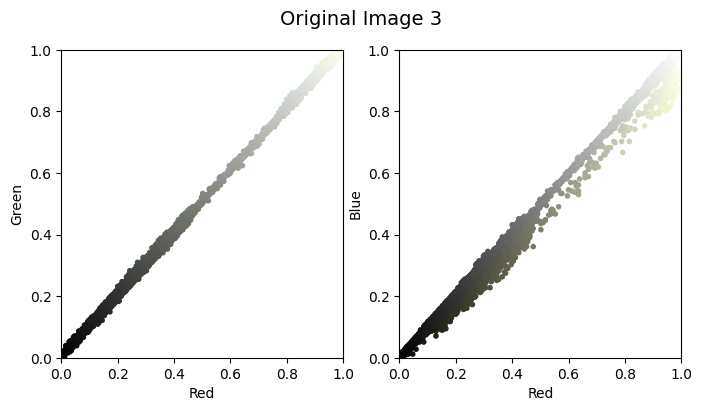

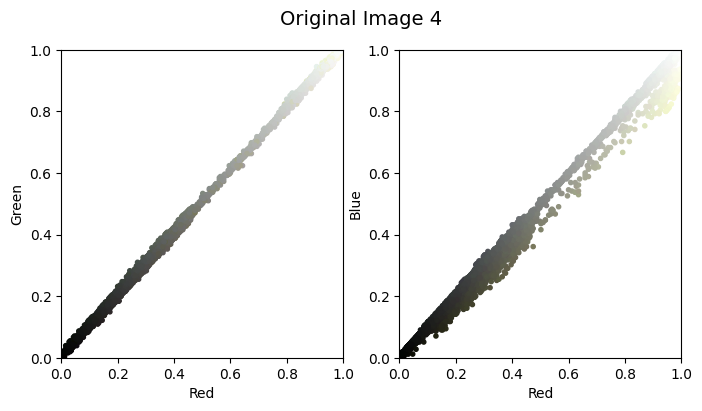

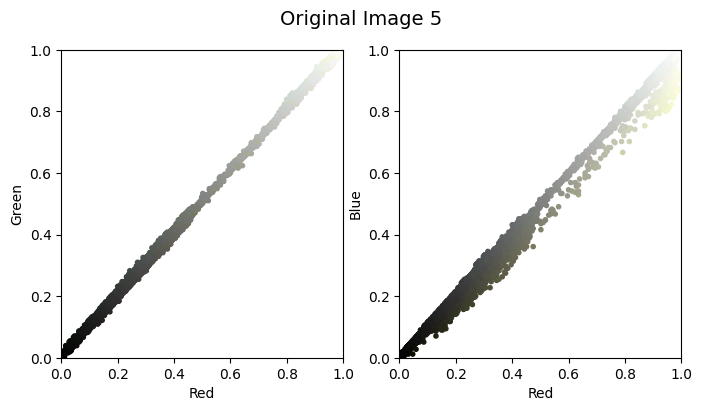

In [63]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

for i in range(5):
  plot_pixels(data, titles[i])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


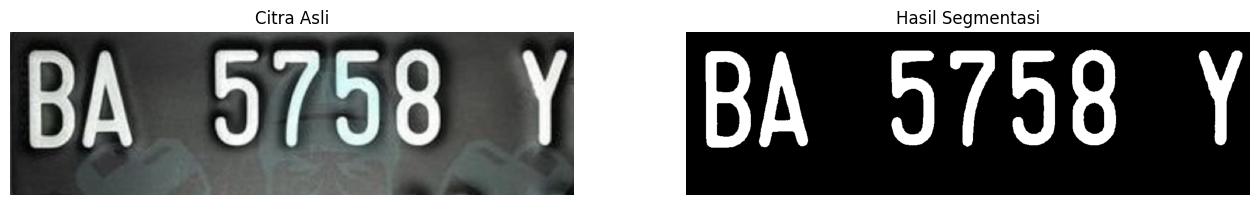

In [65]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Segmentasi')
plt.axis('off')

plt.show()

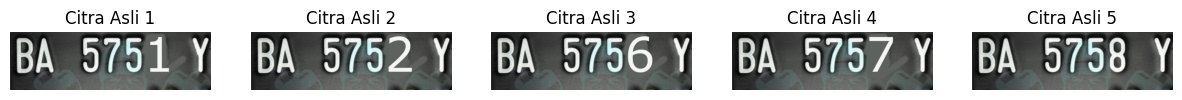

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

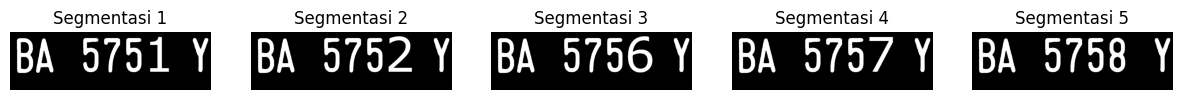

ValueError: ignored

In [97]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_segmentation(img, k=2):
    # Ambil dimensi gambar
    h, w = img.shape[:2]

    # Ubah gambar menjadi format yang sesuai untuk K-Means
    if len(img.shape) == 3:  # Jika citra berwarna
        data = img.reshape((h * w, 3))
    elif len(img.shape) == 2:  # Jika citra grayscale
        data = img.reshape((h * w, 1))
    else:
        raise ValueError("Format citra tidak didukung")

    # Lakukan segmentasi pada gambar dengan K-Means
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    # Dapatkan label cluster untuk setiap piksel
    labels = kmeans.labels_

    # Reshape label menjadi bentuk asli gambar
    segmented_img = labels.reshape(h, w)

    return segmented_img

def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        # Convert image color space from BGR to RGB
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) if len(images[i].shape) == 3 else images[i]
        plt.imshow(img_rgb, cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()



# Menampilkan citra asli
titles = ['Citra Asli 1', 'Citra Asli 2', 'Citra Asli 3', 'Citra Asli 4', 'Citra Asli 5']
show_images(img, titles, figsize=(15, 7))

# Menampilkan hasil segmentasi
segmented_images = [kmeans_segmentation(image, k=2) for image in img]
segmented_titles = ['Segmentasi 1', 'Segmentasi 2', 'Segmentasi 3', 'Segmentasi 4', 'Segmentasi 5']

show_images(segmented_images, segmented_titles, figsize=(15, 7))

# Menampilkan citra recolored
new_colors = kmeans.cluster_centers_.astype(int)
img_recolored = new_colors[segmented_images].reshape(img[0].shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)
plt.show()


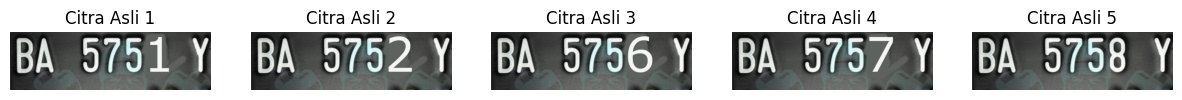

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

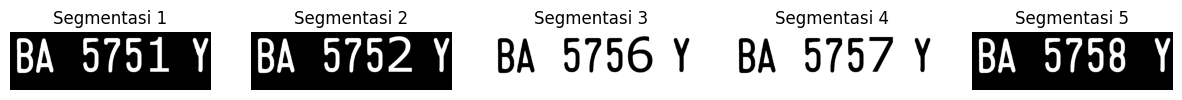

In [102]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_segmentation(img, k=2):
    h, w = img.shape[:2]
    data = img.reshape((h * w, -1))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.labels_
    segmented_img = labels.reshape(h, w)
    return segmented_img, kmeans.cluster_centers_

def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img
        plt.imshow(img_rgb, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Contoh penggunaan
titles = ['Citra Asli 1', 'Citra Asli 2', 'Citra Asli 3', 'Citra Asli 4', 'Citra Asli 5']

# Menampilkan citra asli
show_images(img, titles)

# Menampilkan hasil segmentasi dan mendapatkan cluster centers
segmented_images = []
cluster_centers = []
for image in img:
    segmented_img, centers = kmeans_segmentation(image, k=2)
    segmented_images.append(segmented_img)
    cluster_centers.append(centers)

segmented_titles = ['Segmentasi 1', 'Segmentasi 2', 'Segmentasi 3', 'Segmentasi 4', 'Segmentasi 5']
show_images(segmented_images, segmented_titles)


